In [145]:
options(repr.plot.width=18, repr.plot.height=18)

In [3]:
library(ggplot2)
library(dplyr)
library(tidyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [210]:
demo=read.csv("/Users/sarah/Documents/SCTLD/SCTLD_samples/Survey_Data/CBC_Coral_Demographics.csv")

,diver,site_code,location_name,day,month,year,code,scientific_name,Total,juveniles_1_to_4_cm,isolate_1_to_4_cm,X5_to_10_cm,X11_to_20_cm,X21_to_40_cm,X41_to_80_cm,over_80_cm
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1010,Maggie Johnson,CBC2,CBC Reef Central,6,10,2019,agar,,2,2,0,0,0,0,0,0
1099,Leah Harper,CBC17,Curlew Patch Reef,13,10,2019,agar,,6,5,0,1,0,0,0,0


In [229]:
demo$ID=NULL
demo$latitude=NULL
demo$longitude=NULL
demo$X0_recent_total_mortality=NULL
demo$predation_bites=NULL
demo$X=NULL
demo$depth=NULL
demo$buddy=NULL

In [230]:
site_codes=select(demo, site_code, location_name)

In [231]:
rownames(site_codes)=NULL

In [232]:
(unique(site_codes))

,site_code,location_name
,<chr>,<chr>
1,CBC3,CBC Lagoon Reef
14,CBC20,CBC 30 North
28,CBC17,Curlew Patch Reef
41,CBC21,South Reef 30 North
54,CBC22,Bread and Butter Patch
66,CBC25,Hangman
78,CBC2,CBC Reef Central
107,CBC14,Tobacco Reef
121,CBC6,CBC House Reef


In [350]:
#take out relevant years and remove unneeded columns
demoSCTLD=demo[demo$year %in% c("2019", "2020", "2022"),]
demoSCTLD$yearmonth=paste0(demoSCTLD$year,demoSCTLD$month)
demoSCTLD$yearmonth=gsub("20201", "202001",  demoSCTLD$yearmonth)
demoSCTLD$yearmonth=gsub("20225", "202205",  demoSCTLD$yearmonth)
demoSCTLD$diver=NULL
demoSCTLD$site_code=NULL
demoSCTLD$month=NULL
demoSCTLD$year=NULL
demoSCTLD$day=NULL

In [351]:
dim(demoSCTLD)

[1] 450  12

In [352]:
#when there are multiple entries add them together
demoSCTLD=demoSCTLD%>%
group_by(across(where(is.character))) %>%
 summarise(across(where(is.numeric), sum), .groups = "drop")

In [353]:
dim(demoSCTLD)

[1] 276  12

In [354]:
head(demoSCTLD)

location_name,code,scientific_name,yearmonth,Total,juveniles_1_to_4_cm,isolate_1_to_4_cm,X5_to_10_cm,X11_to_20_cm,X21_to_40_cm,X41_to_80_cm,over_80_cm
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CBC 30 North,aaga,Agaricia agaricites,202001,83,4,4,51,24,0,0,0
CBC 30 North,aaga,Agaricia agaricites,202205,46,9,1,23,11,2,0,0
CBC 30 North,aaga,Agaricia agaricites,202212,33,0,1,16,12,4,0,0
CBC 30 North,alam,Agaricia lamarckiana,202001,1,0,0,1,0,0,0,0
CBC 30 North,aten,Agaricia tenuifolia,202001,25,1,0,2,18,2,2,0
CBC 30 North,aten,Agaricia tenuifolia,202205,21,0,0,2,9,6,4,0


In [355]:
#transpose it longways
demoSCTLD=demoSCTLD%>%
pivot_longer(cols=6:12, names_to = "size", values_to = "count") 


In [356]:
#make over 80 into 120
demoSCTLD$size=gsub("over_80_cm", "over_120_cm",  demoSCTLD$size)

In [357]:
#make size into upper limit of bins
demoSCTLD$size=sub(".*_([^_]+)_[^_]+$", "\\1", demoSCTLD$size)
demoSCTLD$size=as.numeric(demoSCTLD$size)

In [358]:
#remove zero values
#demoSCTLD=demoSCTLD[demoSCTLD$count!=0,]

In [359]:
as.Date(demoSCTLD$monthyear)

Warning message:
“Unknown or uninitialised column: `monthyear`.”


Date of length 0

In [360]:
unique(demoSCTLD$yearmonth)

[1] "202001" "202205" "202212" "201910"

`geom_smooth()` using formula = 'y ~ x'


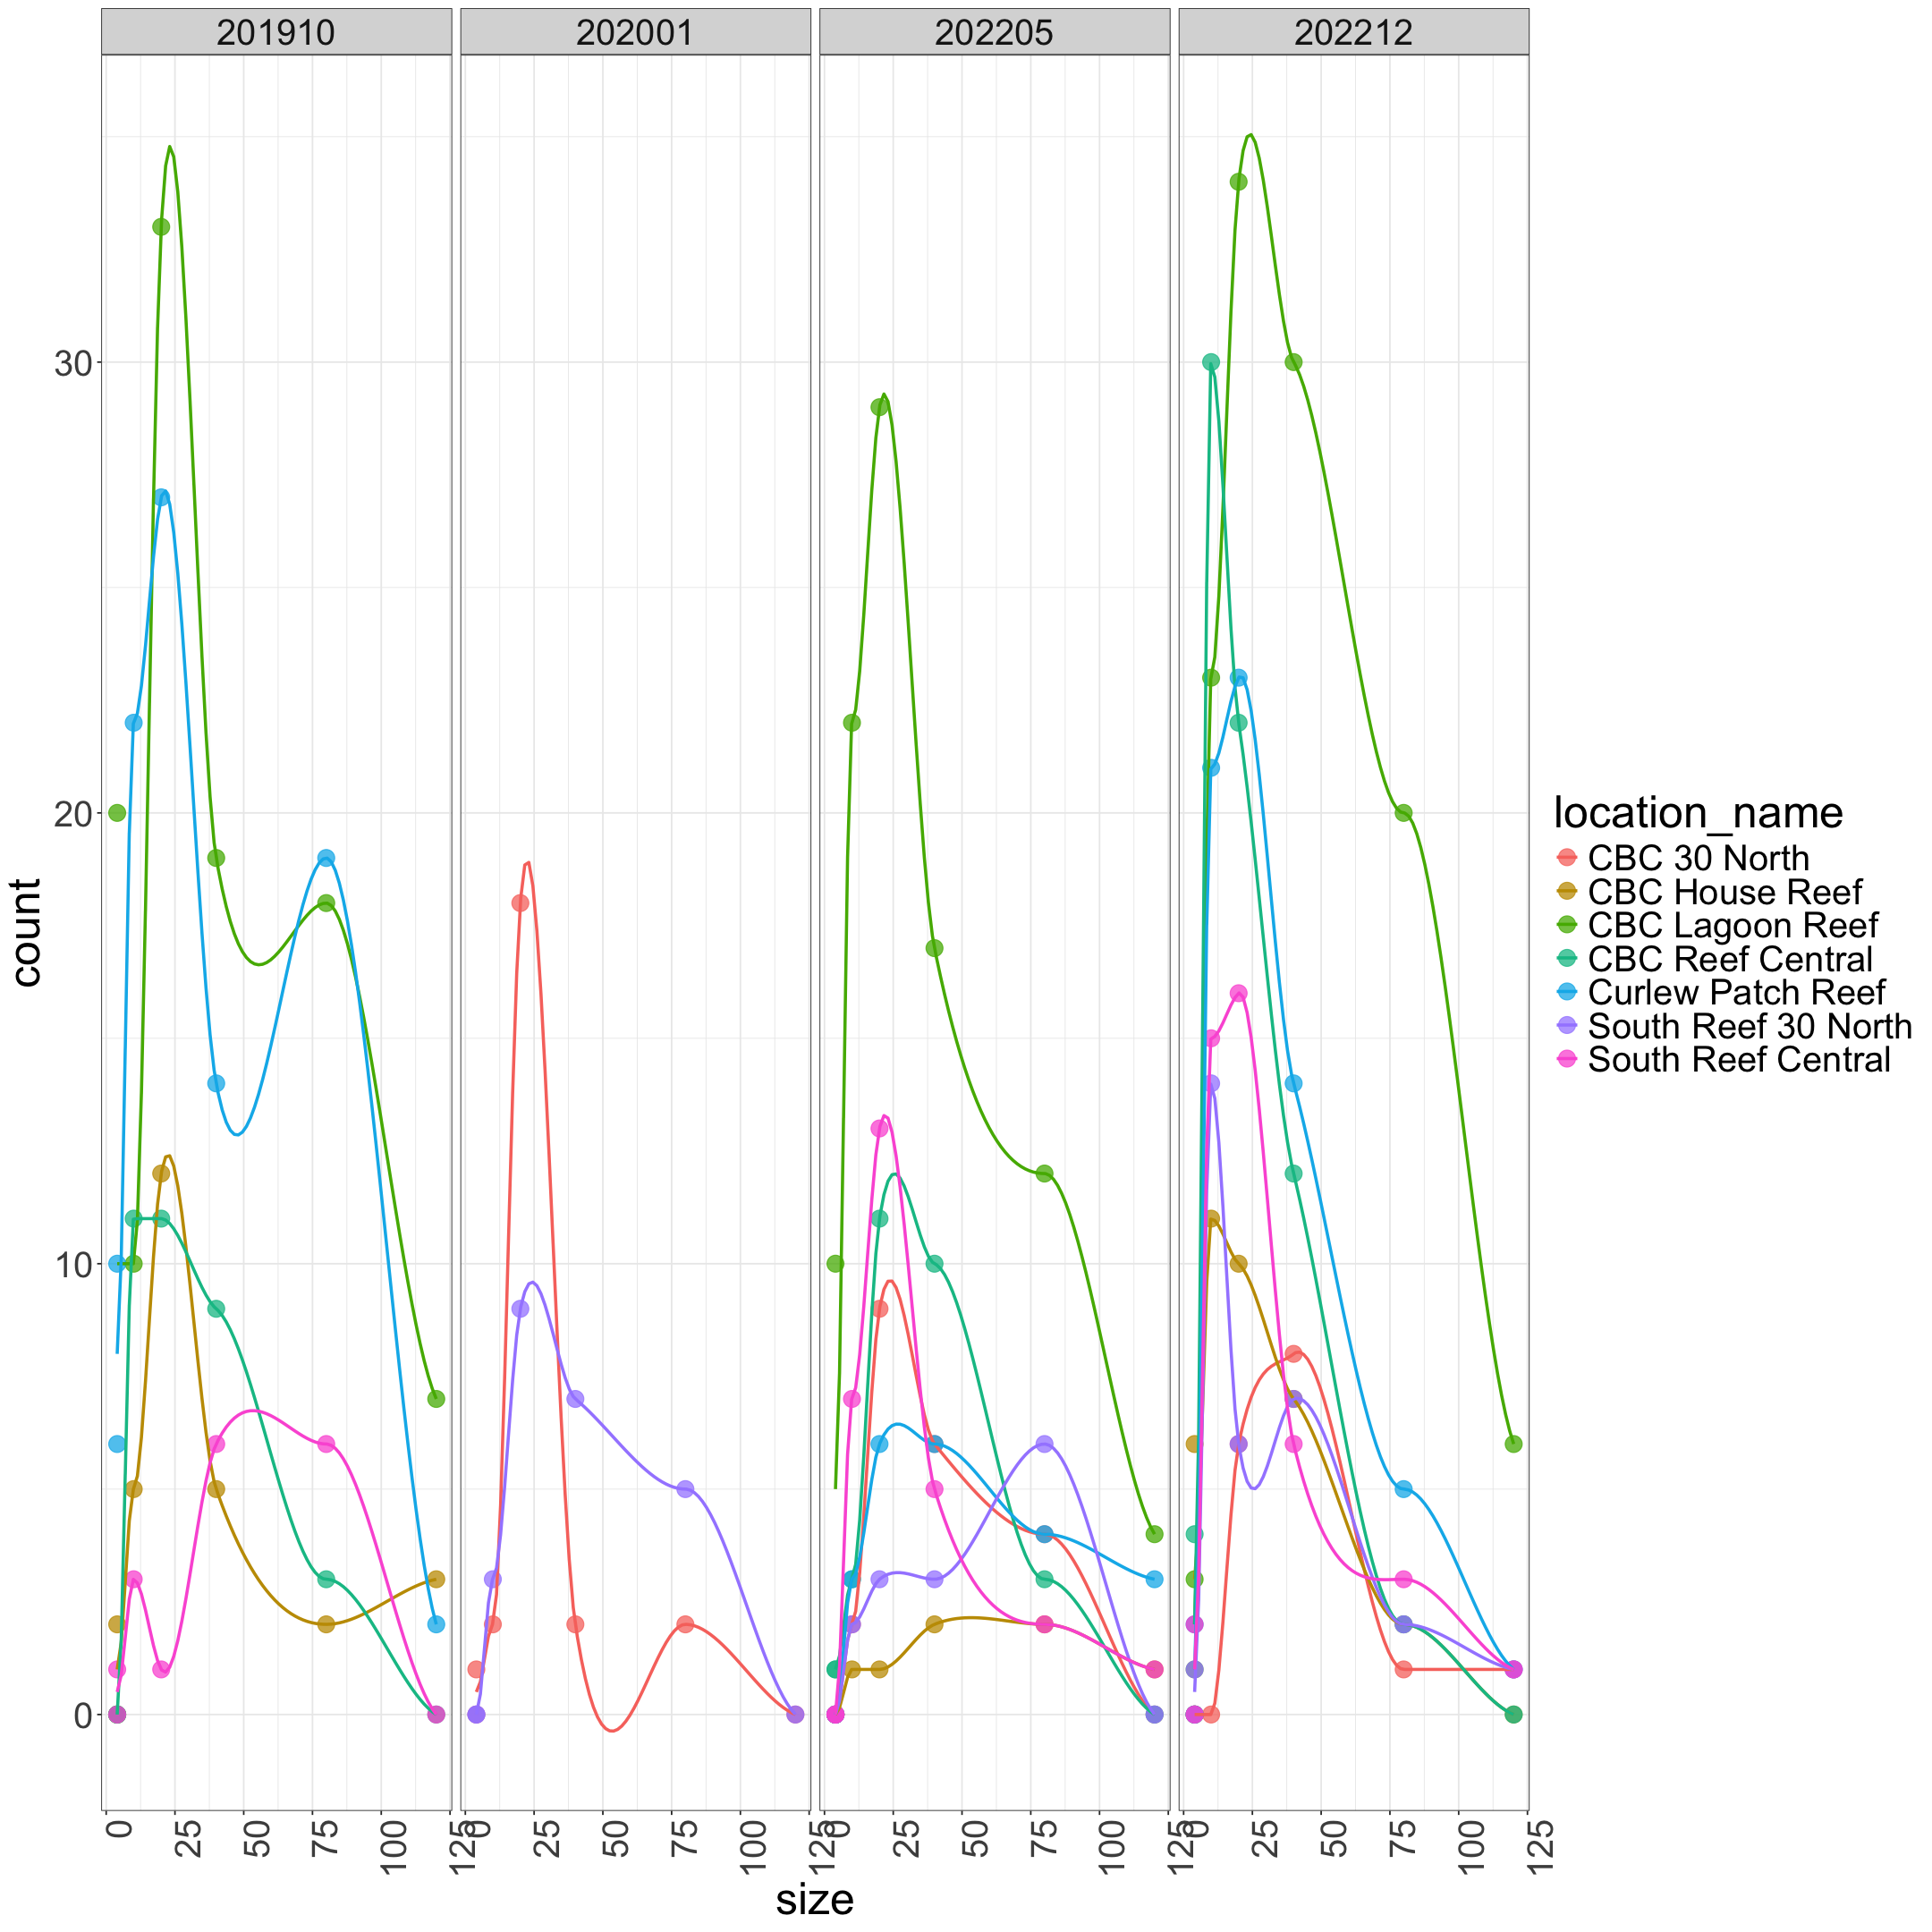

In [361]:
p=ggplot(data=demoSCTLD[demoSCTLD$code %in% c("aten"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.75) +
geom_smooth(method = "loess", span = 0.5, se = FALSE)+
facet_grid(~yearmonth) +
theme_bw()+
theme(text = element_text(size = 30),
        axis.text.x = element_text(angle = 90, hjust = 1)) 
                 
suppressWarnings(print(p))

`geom_smooth()` using formula = 'y ~ x'


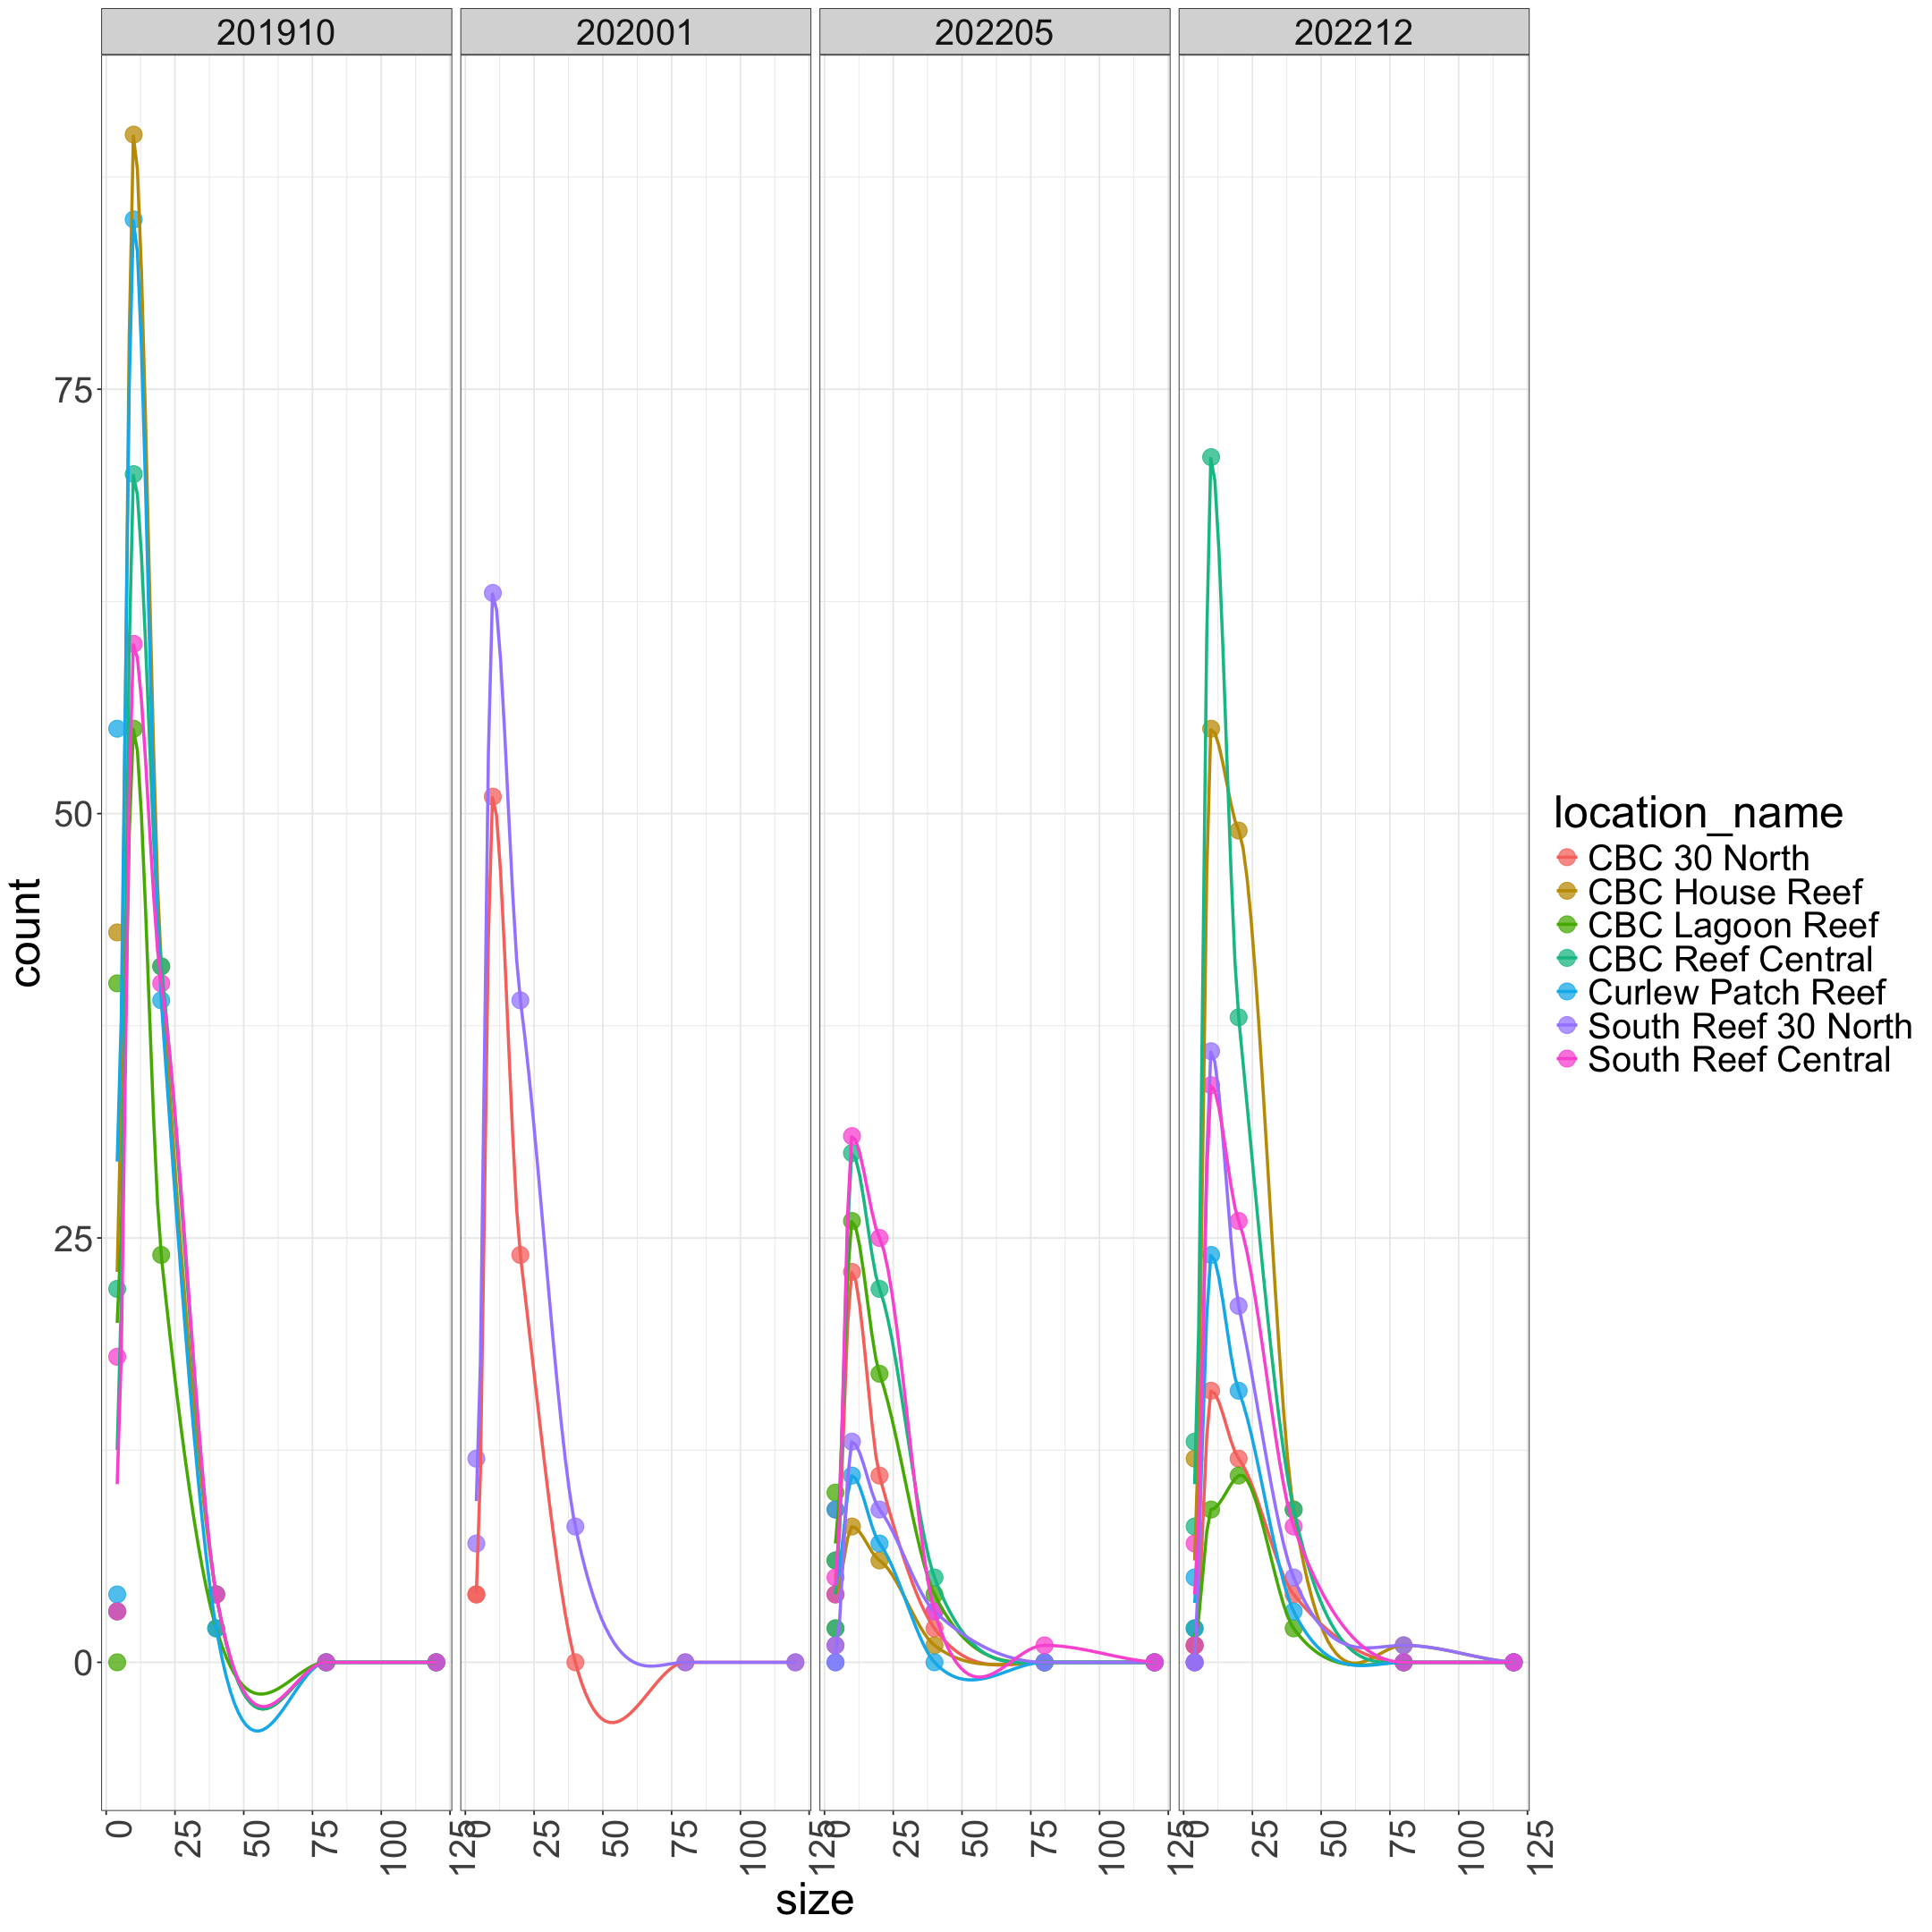

In [363]:
p=ggplot(data=demoSCTLD[demoSCTLD$code %in% c("aaga"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.75) +
geom_smooth(method = "loess", span = 0.5, se = FALSE)+
facet_grid(~yearmonth) +
theme_bw()+
theme(text = element_text(size = 30),
        axis.text.x = element_text(angle = 90, hjust = 1)) 
                 
suppressWarnings(print(p))

`geom_smooth()` using formula = 'y ~ x'


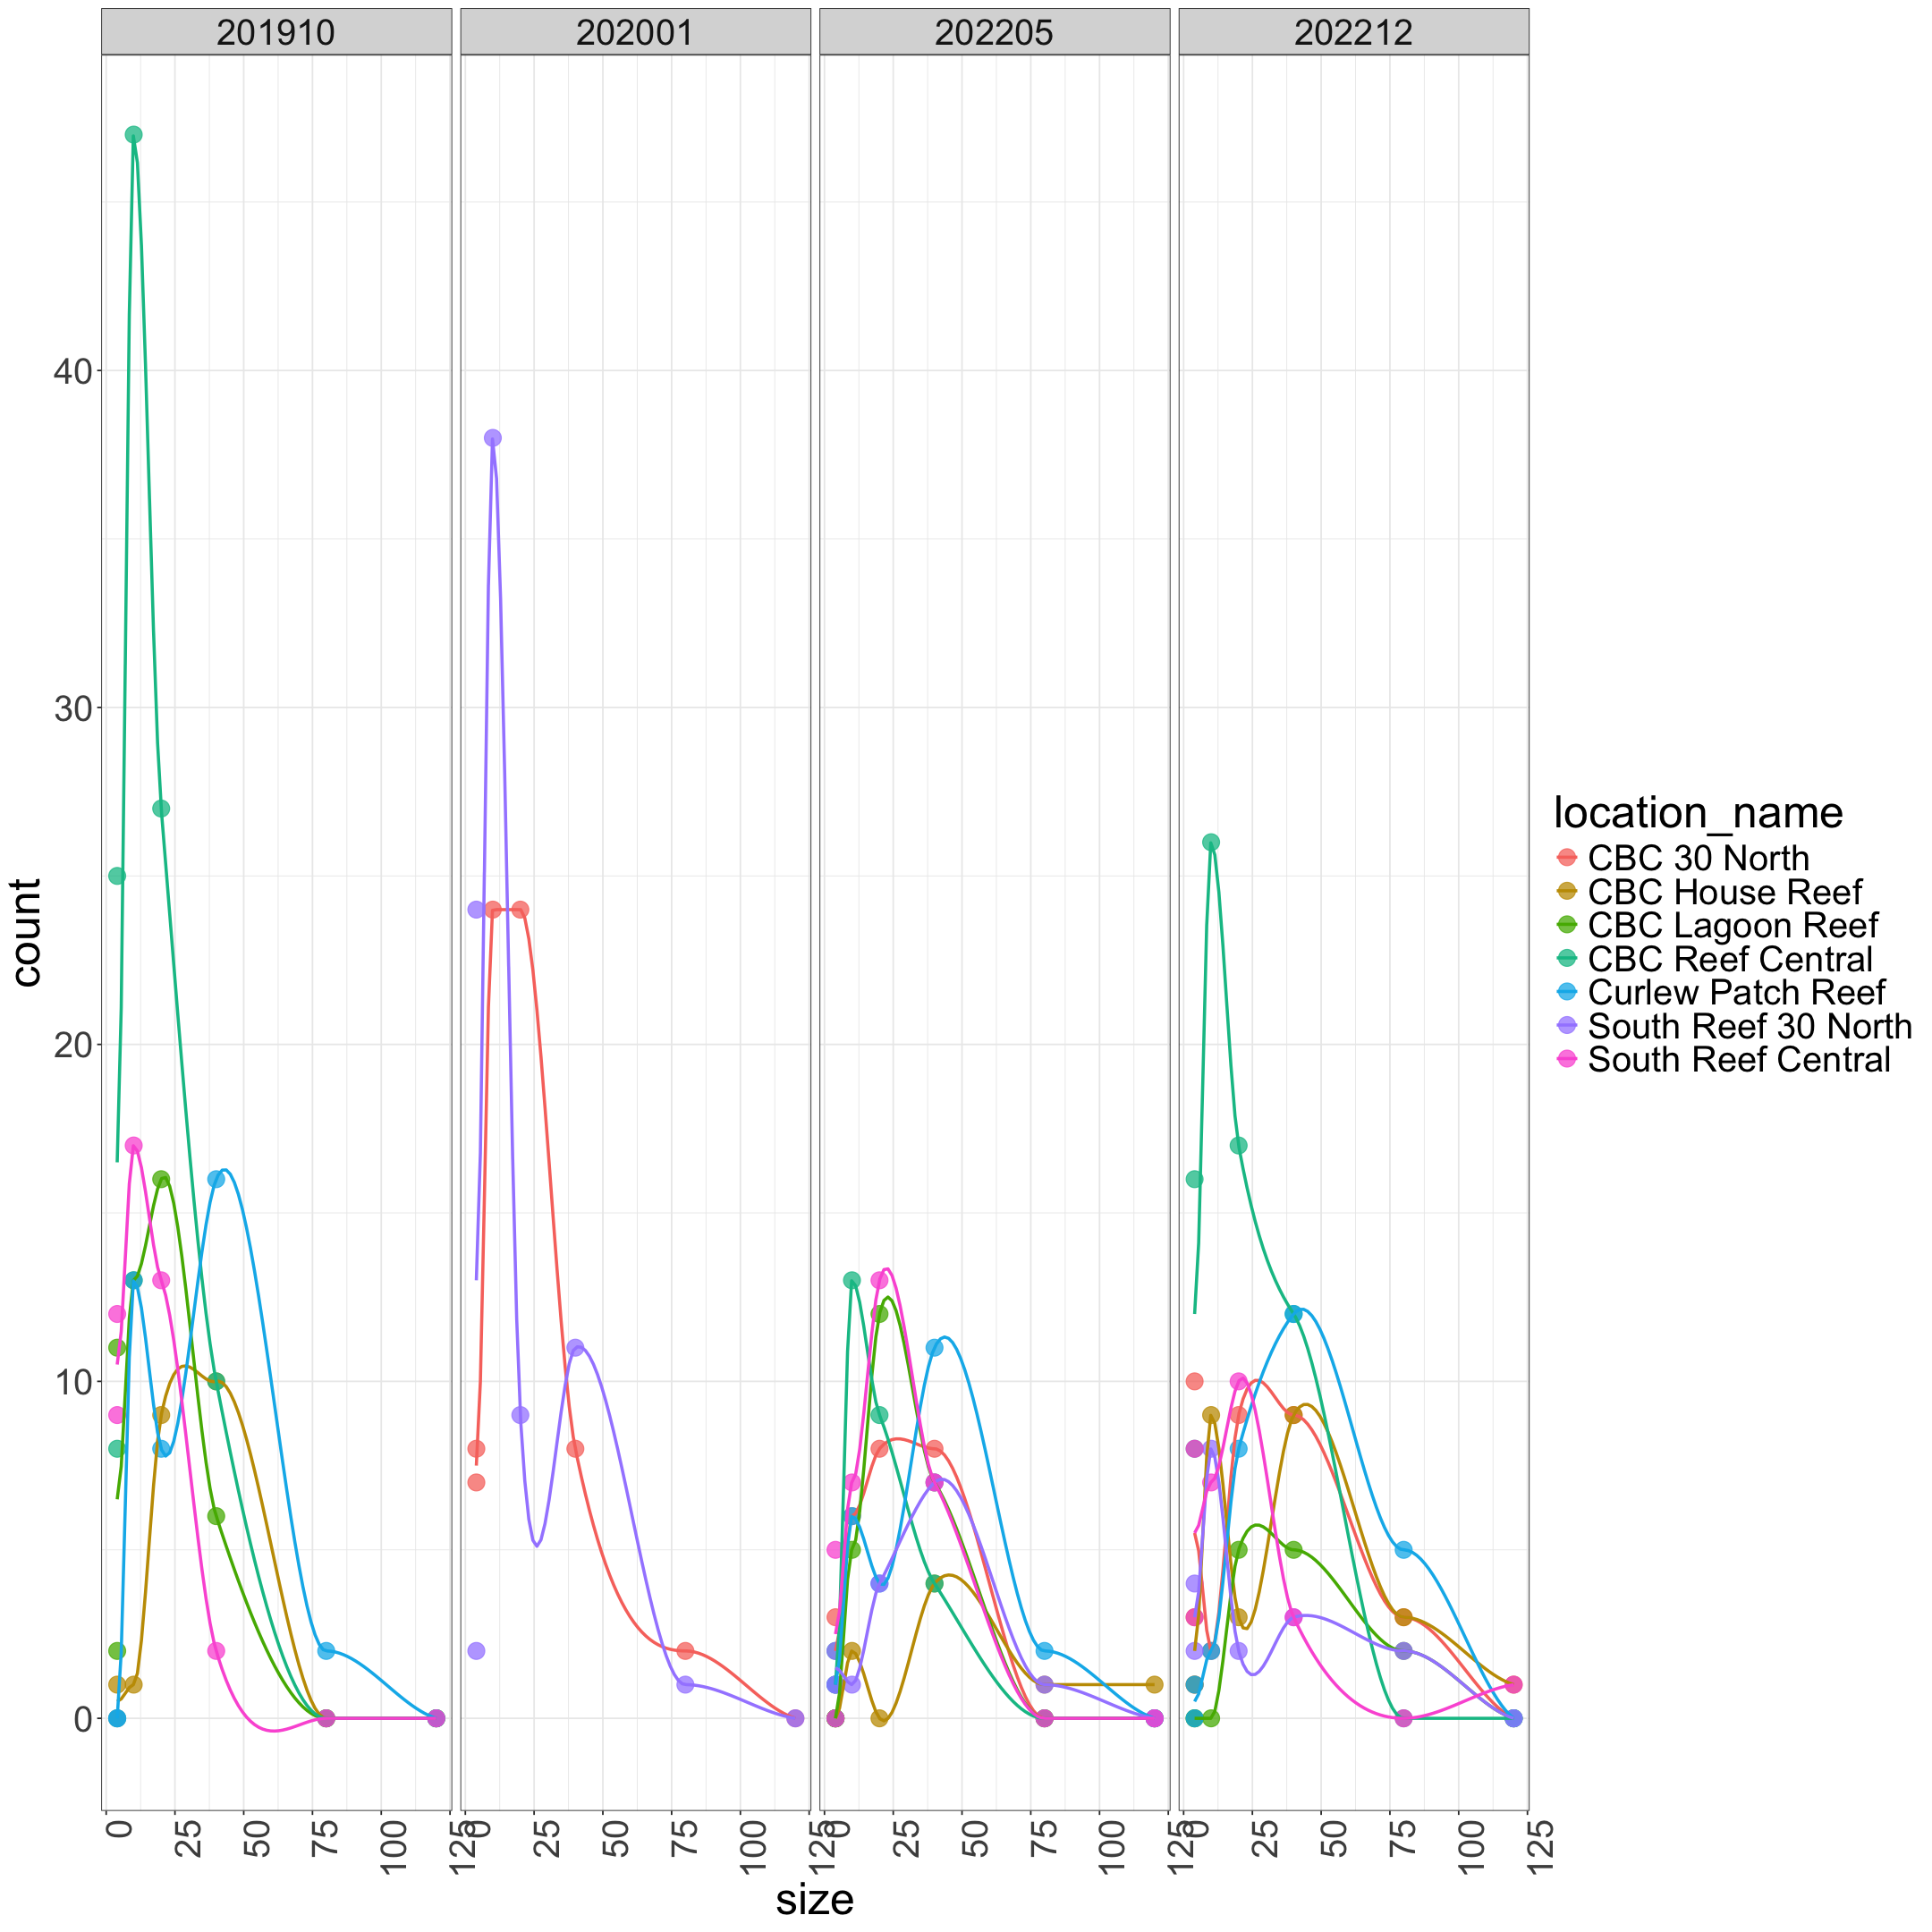

In [364]:
p=ggplot(data=demoSCTLD[demoSCTLD$code %in% c("ssid"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.75) +
geom_smooth(method = "loess", span = 0.5, se = FALSE)+
facet_grid(~yearmonth) +
theme_bw()+
theme(text = element_text(size = 30),
        axis.text.x = element_text(angle = 90, hjust = 1)) 
                 
suppressWarnings(print(p))

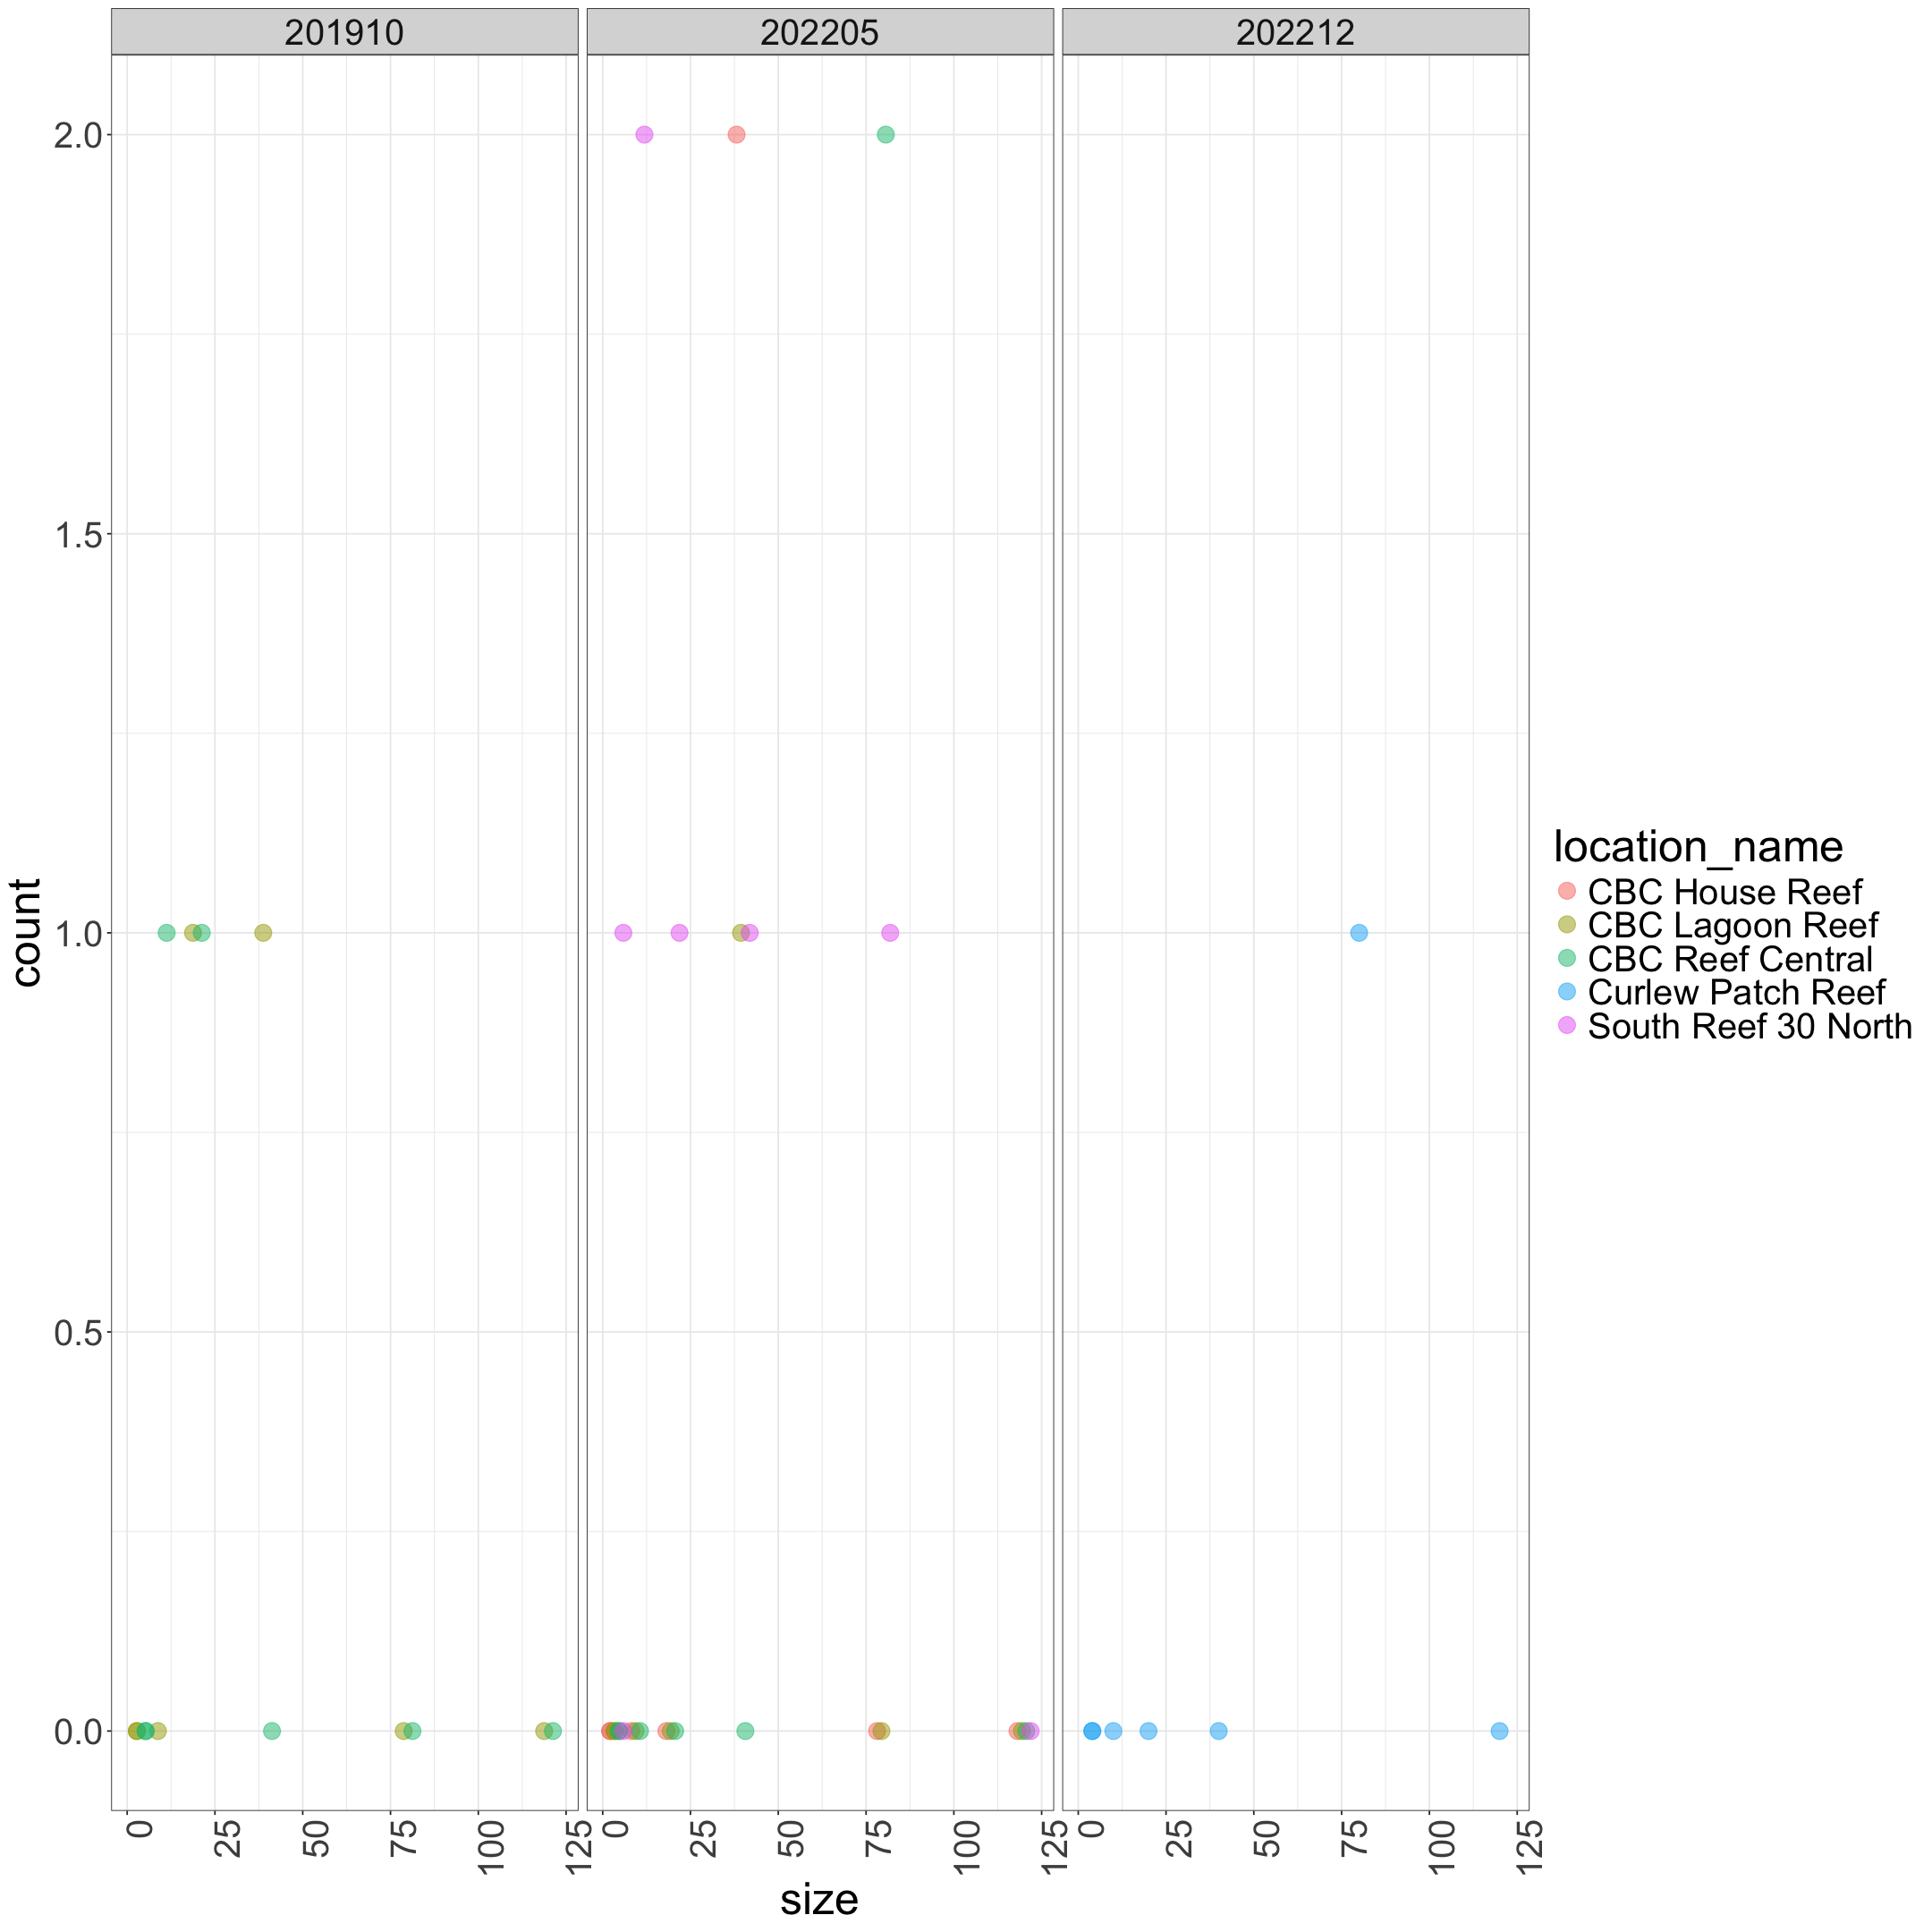

In [374]:
p=ggplot(data=demoSCTLD[demoSCTLD$code %in% c("dlab"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.5, position = position_dodge(5)) +
#geom_smooth(method = "loess", span = 0.5, se = FALSE)+
facet_grid(~yearmonth) +
theme_bw()+
theme(text = element_text(size = 30),
        axis.text.x = element_text(angle = 90, hjust = 1)) 
                 
suppressWarnings(print(p))

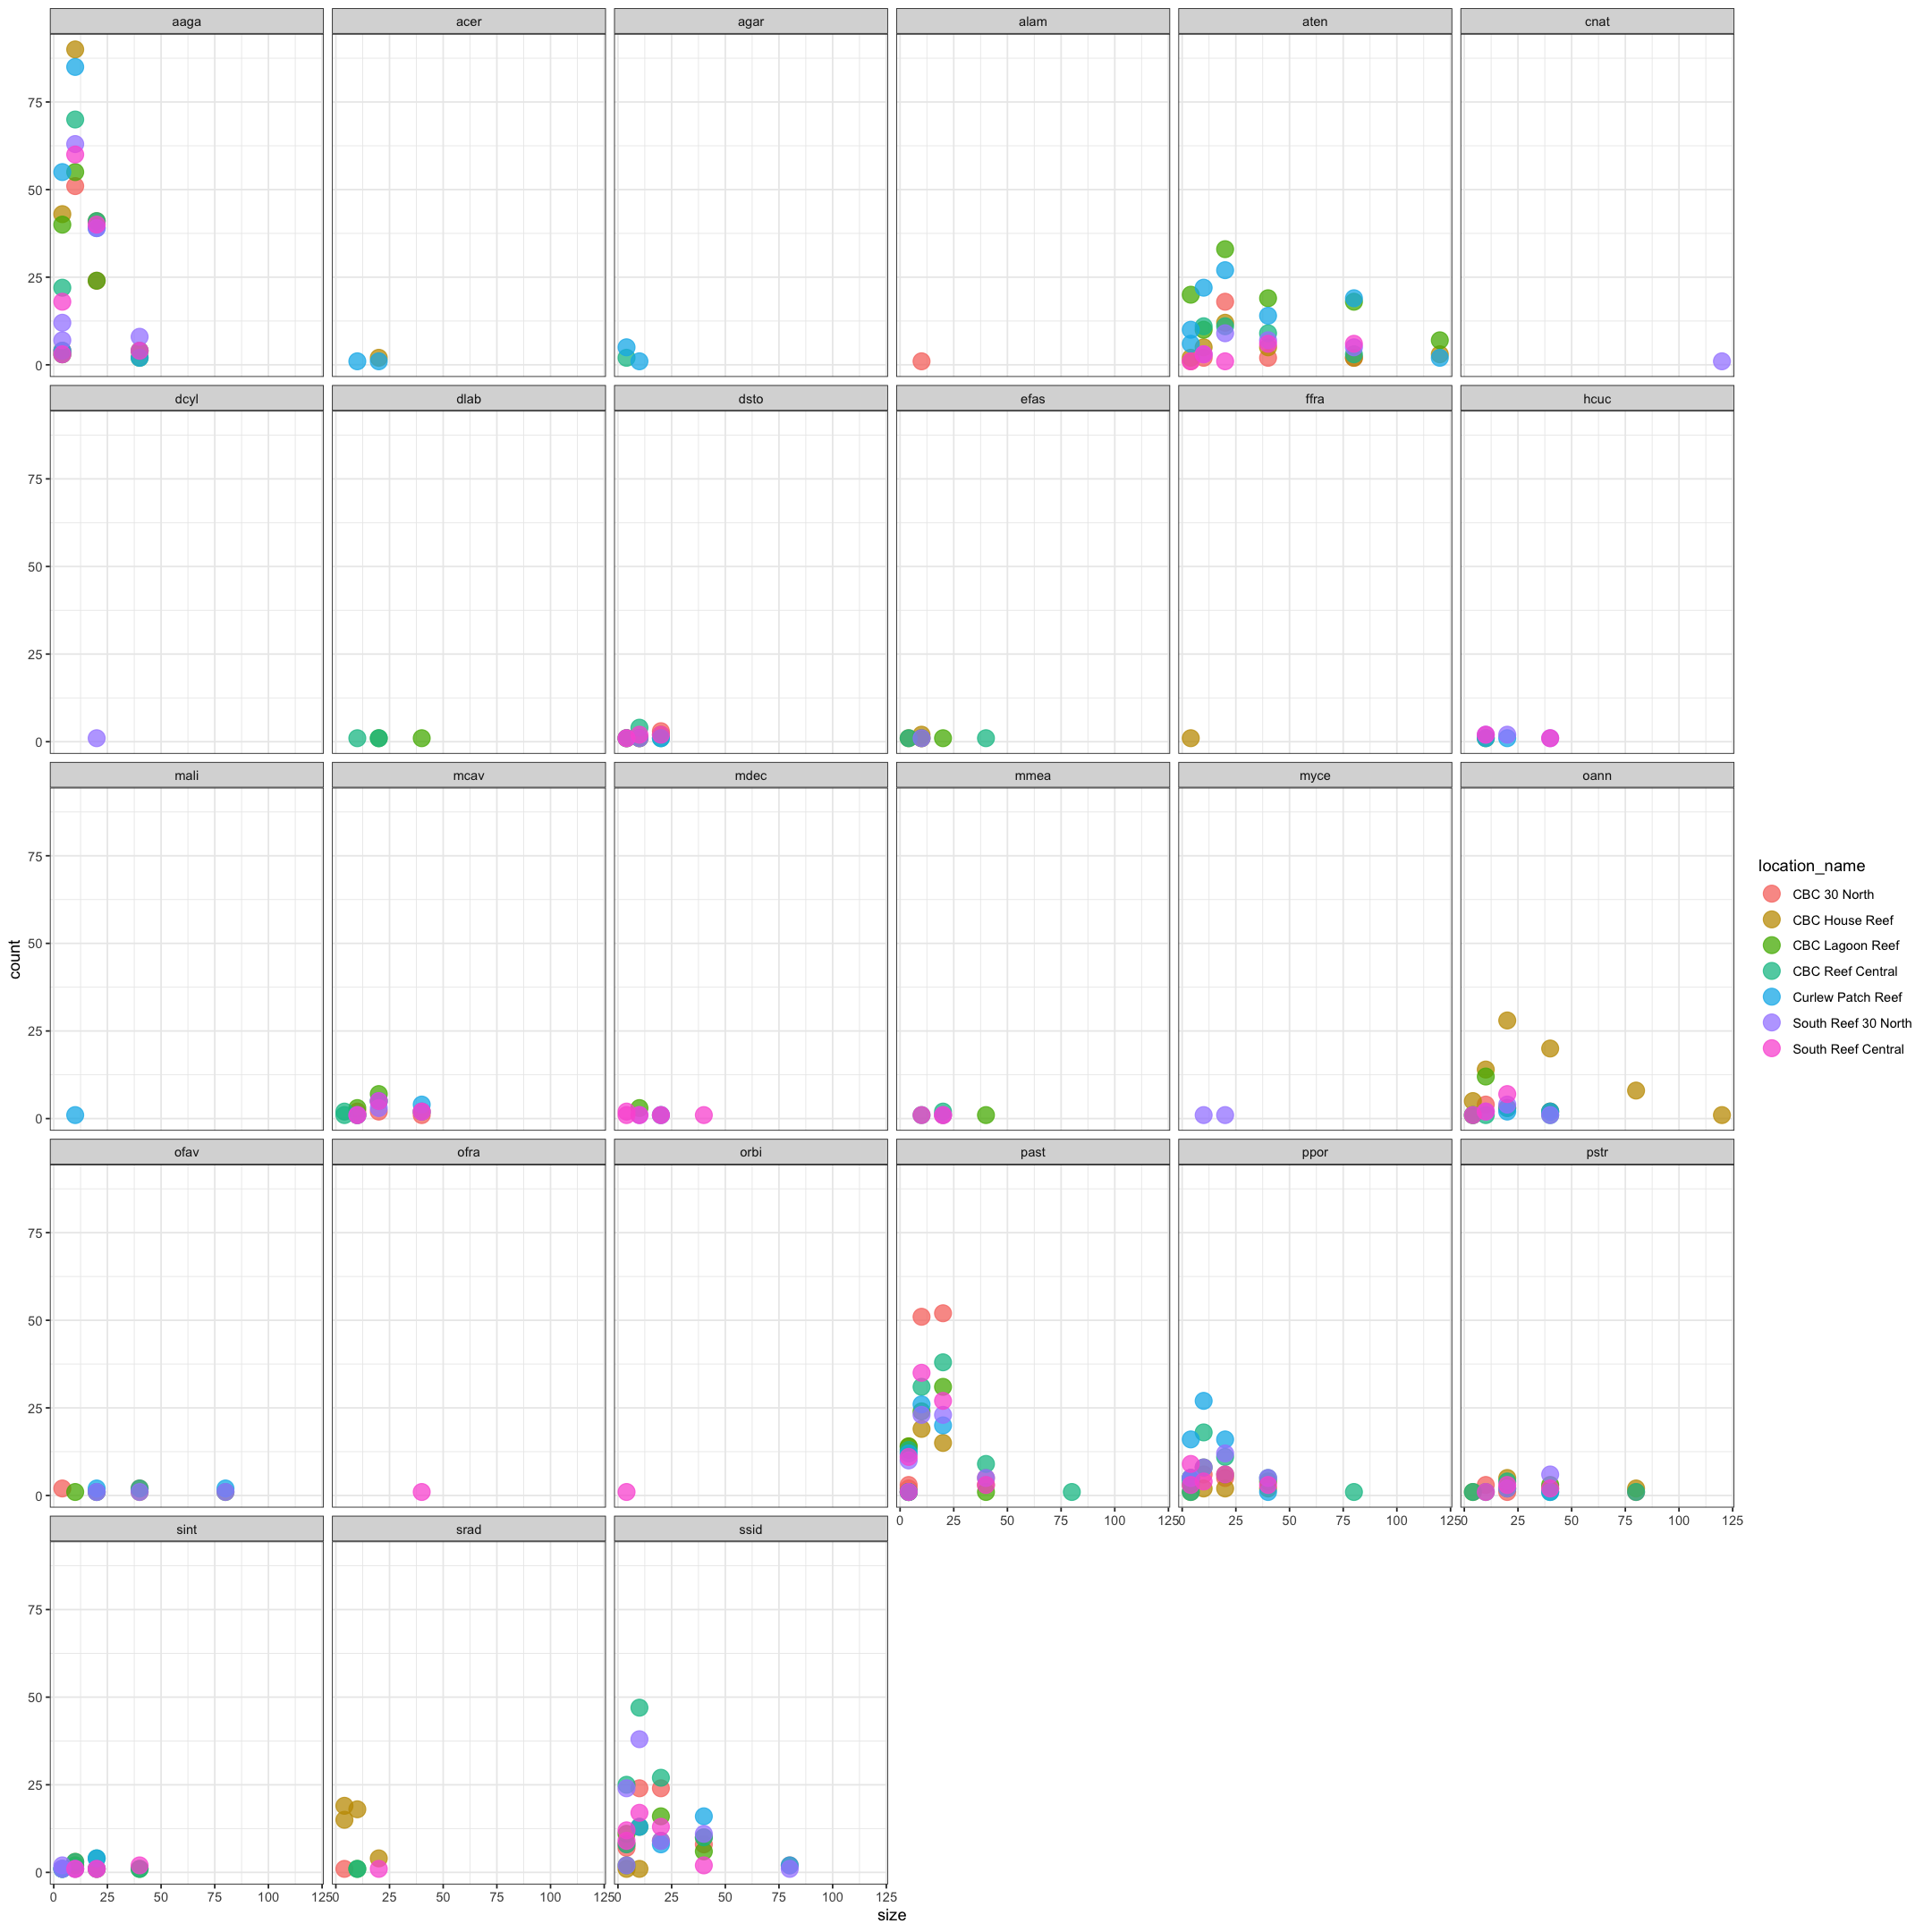

In [258]:
ggplot(data=demoSCTLD[demoSCTLD$monthyear %in% c("102019","12020"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.75) +
facet_wrap(~code) +
theme_bw()

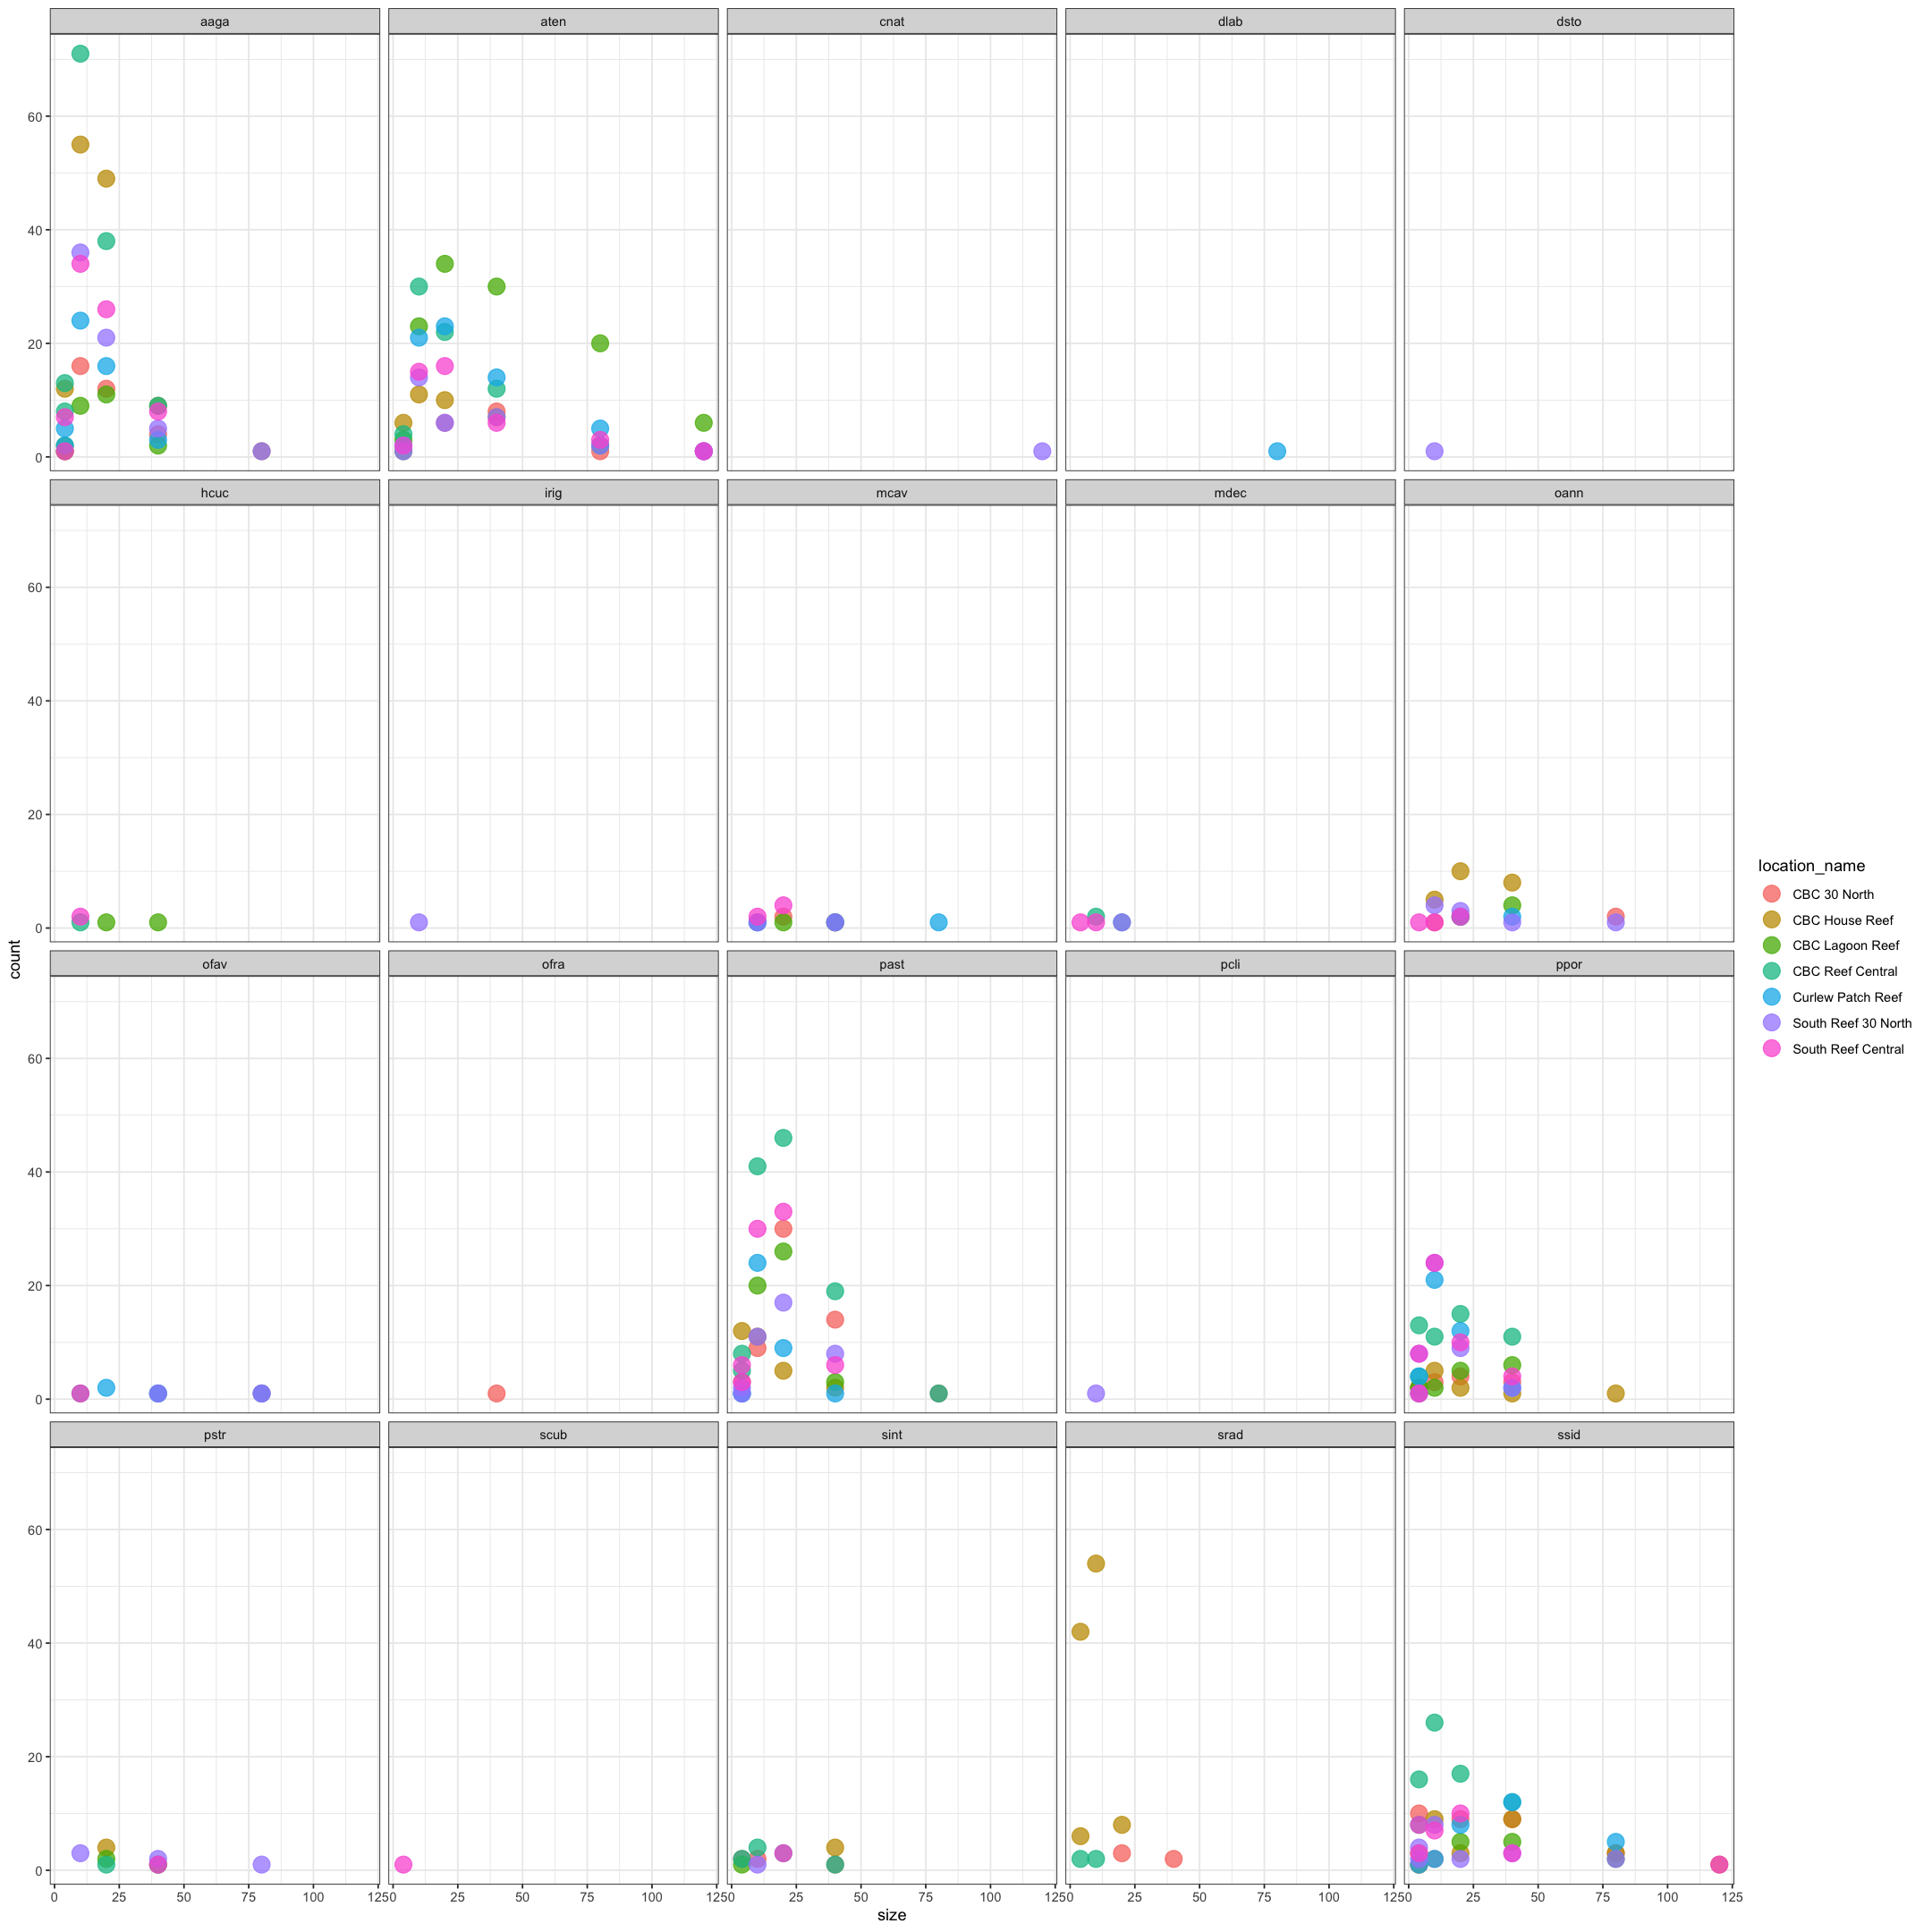

In [260]:
ggplot(data=demoSCTLD[demoSCTLD$monthyear %in% c("122022"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.75) +
facet_wrap(~code) +
theme_bw()

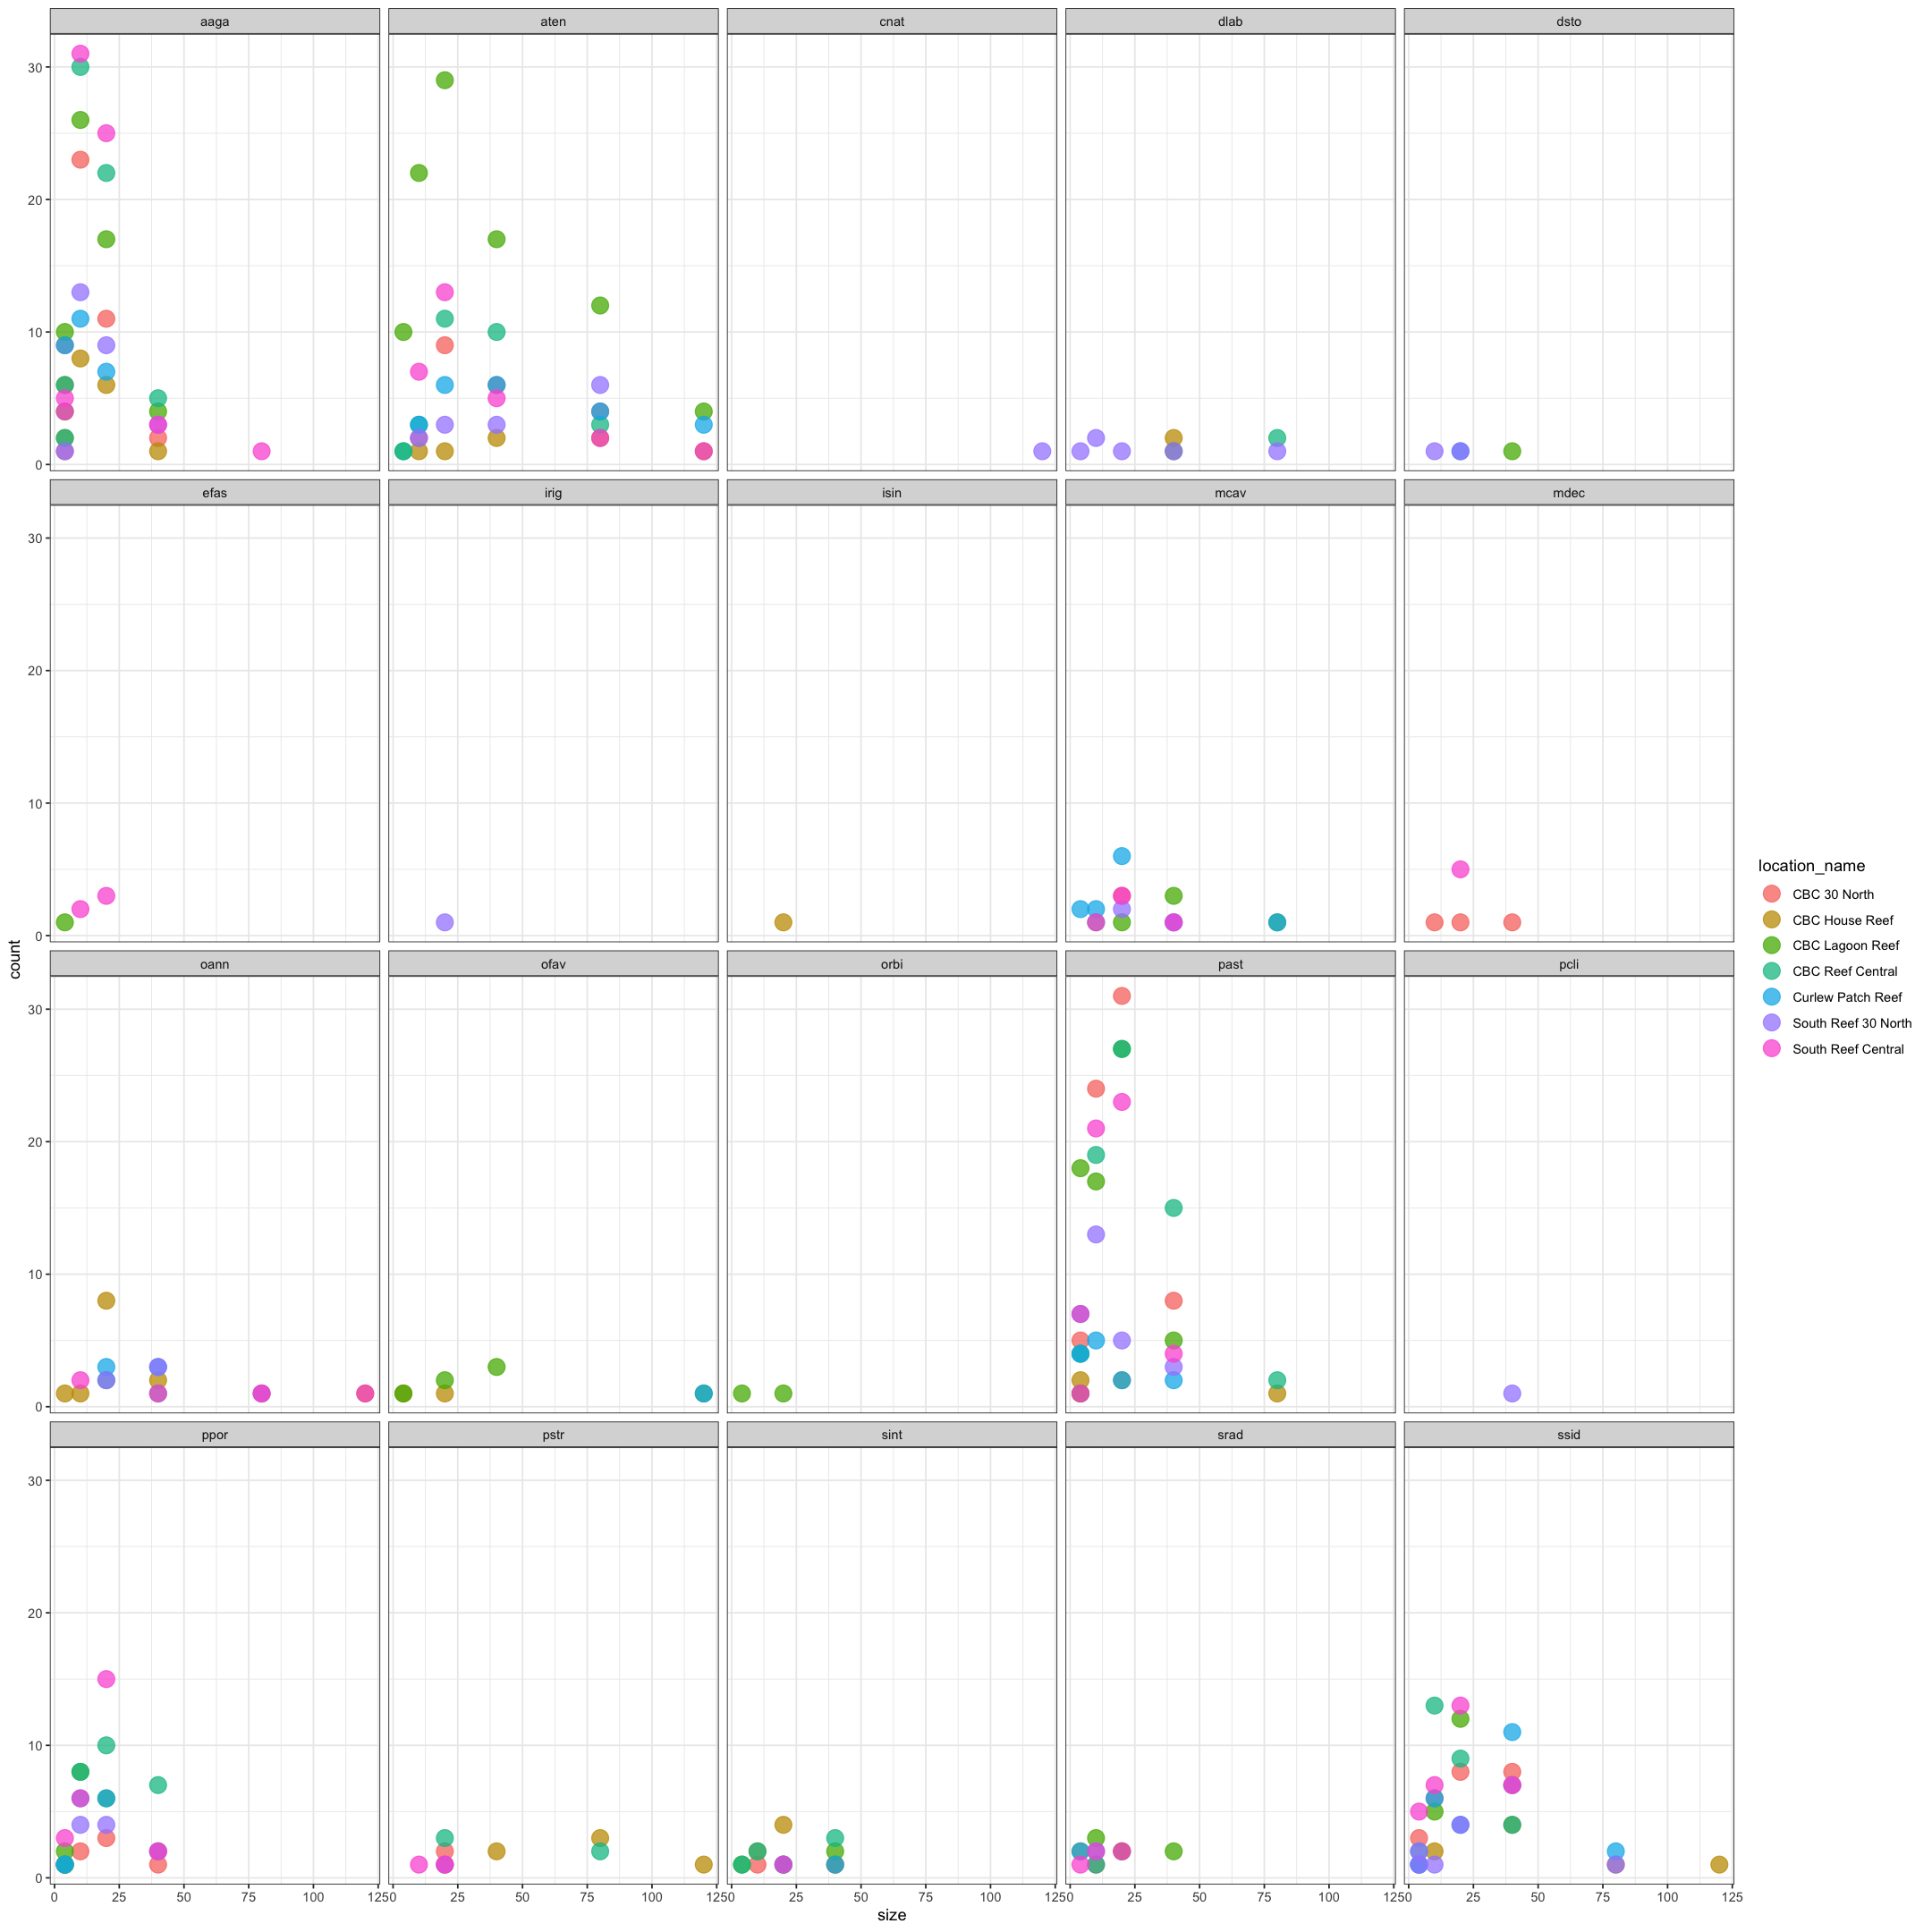

In [261]:
ggplot(data=demoSCTLD[demoSCTLD$monthyear %in% c("52022"),], aes(x=size, y=count, group=location_name, color=location_name)) +
    geom_point(size=5, alpha=0.75) +
facet_wrap(~code) +
theme_bw()